In [ ]:
from google.colab import auth
from google.colab import drive
drive.mount('/content/drive')
import os
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/Face mask project1")
Data_set = 'Dataset'
print(os.listdir(Data_set))

['with_mask', 'without_mask']


In [ ]:
Listdir = os.listdir(Data_set)
making_label = [i for i in range(len(Listdir))]
making_label_dict = dict(zip(Listdir,making_label))
print(making_label_dict)

{'with_mask': 0, 'without_mask': 1}


In [ ]:
data = [] 
target = []
for i in Listdir:
  folder = os.path.join(Data_set,i)
  j = os.listdir(folder)
  for k in j:
    img_path = os.path.join(folder,k)
    image = cv2.imread(img_path)
    try:
      gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
      re_size = cv2.resize(gray_img,(100,100))
      data.append(re_size)
      target.append(making_label_dict[i])
    except Exception as e:
      print('Exception occur',e)


In [ ]:
from keras.utils import np_utils
Data = np.array(data)/255.0
Data = np.reshape(Data,(Data.shape[0],100,100,1))
target = np.array(target)
Target = np_utils.to_categorical(target)
np.save('Data',Data)
np.save('Target',Target)

In [ ]:
data=np.load('Data.npy')
target=np.load('Target.npy')
model=Sequential()
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer folowed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers
model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.7127 - accuracy: 0.5258WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
18/18 [==============================] - 42s 2s/step - loss: 0.7127 - accuracy: 0.5258 - val_loss: 0.6908 - val_accuracy: 0.5177
Epoch 2/20
18/18 [==============================] - 48s 3s/step - loss: 0.6566 - accuracy: 0.5971 - val_loss: 0.5528 - val_accuracy: 0.7376
Epoch 3/20
18/18 [==============================] - 42s 2s/step - loss: 0.5365 - accuracy: 0.7237 - val_loss

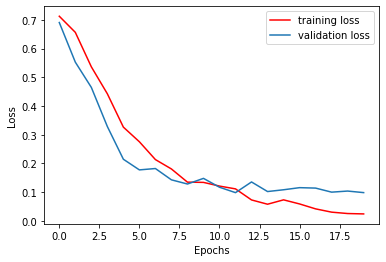

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

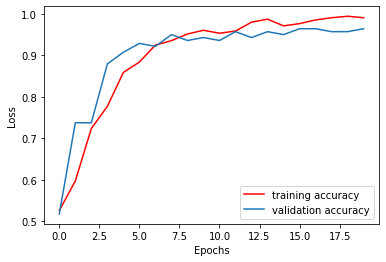

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

3/3 [==============================] - 1s 319ms/step - loss: 0.2979 - accuracy: 0.9241
[0.29793259501457214, 0.9240506291389465]


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44269  100 44269    0     0   118k      0 --:--:-- --:--:-- --:--:--  118k


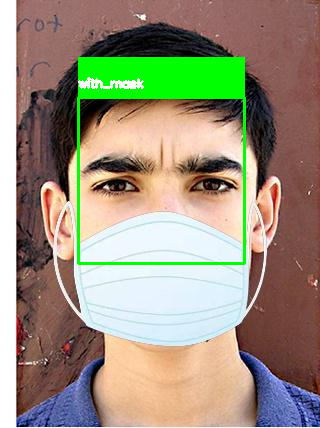

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
os.chdir("/content/drive/My Drive")
cascade = 'haarcascade_frontalcatface.xml'
!curl -o img.jpg https://www.sfcdcp.org/wp-content/uploads/2017/12/iStock-182423254-830x425.jpg
faceCascade = cv2.CascadeClassifier(cascade)
image = cv2.imread('m1.jpg', cv2.IMREAD_UNCHANGED)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}
Face = faceCascade.detectMultiScale(gray_image,1.3,5)
#####################################################
for x,y,w,h in Face:
    
        face_img=gray_image[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(image,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(image,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(image, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.4,(255,255,255),2)
        
cv2_imshow(image)